In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import glob
import matplotlib.pyplot as plt
import glob
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


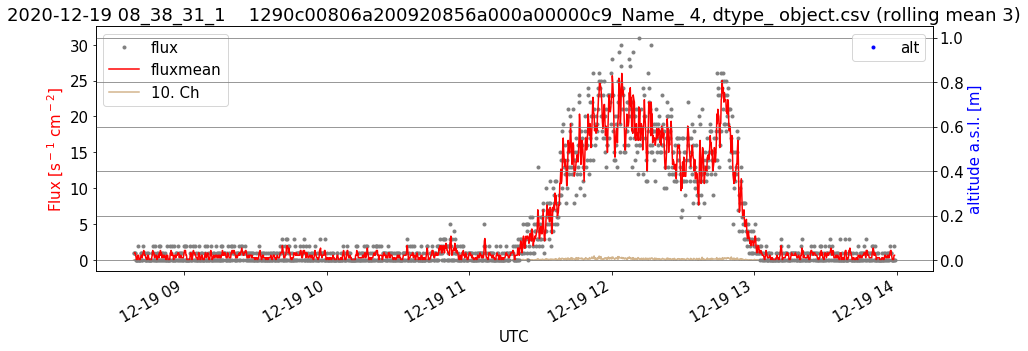

In [5]:
matplotlib.rcParams.update({'font.size': 15})

NOISE_LEVEL= 10
LAST_CHANNEL=254
WINDOW = 3

for f in glob.iglob("/storage/experiments/2020/12_fik6/CARI/*.csv"): # generator, search immediate subdirectories 
    try:
        plt.figure(figsize=(15,5))
        plt.tight_layout()
        xx = pd.read_csv(f)
        xx['date'] = pd.to_datetime(xx['date'])
        xx.set_index('date', inplace = True)
        xx.sort_index(inplace = True)
        #xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
        #xx = xx.loc['2020-12-04 11:55:00':'2020-12-04 12:20:00']

        
        xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))#/2/10.4

        xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

        xx['flux'].plot(c='gray', linestyle='', marker='.')
        xx['fluxmean'].plot(c='red')
        (xx.iloc[:,NOISE_LEVEL]/2/10.4).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

        s = f.split('/')
        plt.title(s[len(s)-1] + ' (rolling mean ' + str(WINDOW) + ')')
        #plt.ylim([0,1.5])
        plt.xlabel('UTC')
        plt.ylabel(r'Flux [s$^-$$^1$ cm$^-$$^2$]', color='red')
        plt.legend(loc=2)

        ax = plt.twinx()
                
        #plt.ylim([0,14000])
        xx['altitude'].plot(c='b', label='alt', marker='.', linewidth='2', linestyle='none', drawstyle='steps-mid')
        plt.ylabel('altitude a.s.l. [m]', color='blue')

        plt.grid(b=True, which='major', color='grey', linestyle='-')
        plt.grid(b=True, which='minor', color='grey', linestyle='-')
        plt.legend()
    except:
        pass



ct.csv
2020-12-19 08_38_31_1    1290c00806a200920856a000a00000c9_Name_ 4, dtype_ object.csv
       6        7      8    9   10   11
29  5176  14326.0  796.0  1.0  0.0  0.0
30  5179  14334.0  800.0  6.0  0.0  0.0
Window = 260.0 [s]
Mean Doserate from rolling mean values = 2.8 [μGy/h]
Mean Doserate = 2.81 [μGy/h]
Standard deviation from rolling mean values = 1.64



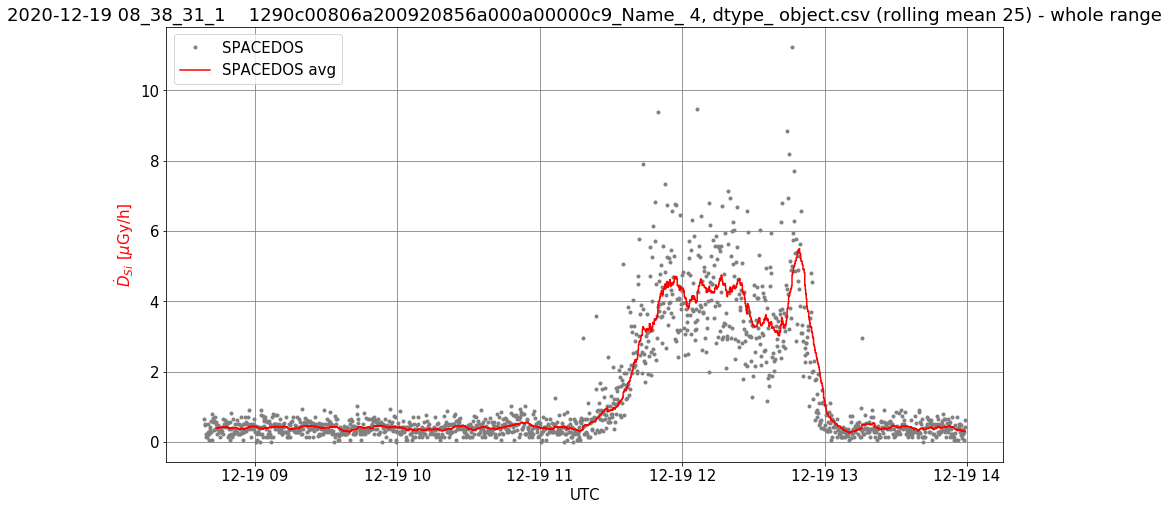

In [20]:
matplotlib.rcParams.update({'font.size': 15})

NOISE_LEVEL= 10     #  8 for DD, 9 for 98, 10 fo C9
BASE_ENERGY = 3
LAST_CHANNEL=245#64#245
WINDOW = 25

for f in glob.iglob("/storage/experiments/2020/12_fik6/CARI/*.csv"): # generator, search immediate subdirectories 
    plt.figure(figsize=(15,8))
    plt.tight_layout()
    xx = pd.read_csv(f)
    xx['date'] = pd.to_datetime(xx['date'])
    xx = xx.loc[xx['date'].isnull()==False]

    #xx.set_index('date', inplace = True)
    #xx = xx.loc['2020-12-04 12:00:00':'2020-12-04 12:18:00']

    s = f.split('/')
    plt.title(s[len(s)-1] + ' (rolling mean ' + str(WINDOW) + ') - whole range')
    print(s[len(s)-1][-6:])
        
    # Deposited energy
    e = pd.DataFrame()
    e['Ch']=range(0,256)
    e['ener'] = e.index * 0.038 + 0.105
    xx['ener'] = (np.asarray(xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+LAST_CHANNEL]) * np.asarray(e.loc[2:LAST_CHANNEL+1,'ener'])).sum(axis=1)    
    
    print(s[len(s)-1])
    print(xx.iloc[10:12,NOISE_LEVEL-3:NOISE_LEVEL+3])

    # size of the chip (20 mm · 10 mm), 
    # the thickness of the depletion layer (0.3 mm), 
    # and the density of silicon (2.33 g cm^3)
    # 0.1398e-3 kg
    xx['dsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3)/10.4) * 3600 # in uGy/h

    xx['dsimean'] = xx['dsi'].rolling(WINDOW).mean()
    #xx.dropna(how='any', inplace=True)

    #plt.plot(xx['minute'], xx['flux'], c='gray', linestyle='', marker='.')
    plt.plot(xx['date'], xx['dsi'], c='gray', linestyle='', marker='.', label='SPACEDOS')
    plt.plot(xx['date'],xx['dsimean'],c='red', drawstyle='steps-mid', label='SPACEDOS avg')
    #plt.plot(xx.iloc[:,'minute'],xx['fluxmean']c='red')
    #plt.plot(xx.loc[:,'minute'],xx.iloc[:,NOISE_LEVEL],c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

    #plt.ylim([0,10])
    #plt.yscale('log')

    plt.xlabel('UTC')
    plt.ylabel(r'$\.D$$_S$$_i$ [$\mu$Gy/h]', color='red')
    plt.legend(loc=2)

    plt.grid(b=True, which='major', color='grey', linestyle='-')
    plt.grid(b=True, which='minor', color='grey', linestyle='-')

    dose = xx.copy()
    dose.set_index('date', inplace=True)

    # Calculation of doserate for given time period
    dose = dose.loc['2020-12-19 11:00:00':'2020-12-19 13:0:00']

    print('Window =', WINDOW * 10.4, '[s]' )
    print('Mean Doserate from rolling mean values =', round(dose.dsimean.mean(), 2), '[\u03BCGy/h]' )
    print('Mean Doserate =', round(dose.dsi.mean(), 2), '[\u03BCGy/h]' )
    print('Standard deviation from rolling mean values =', round(dose.dsimean.std(), 2))
    print()
    
    break


In [16]:
xx.iloc[:,7:]
xx
xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+LAST_CHANNEL]
#e.loc[2:LAST_CHANNEL+1,'ener']

,9,10,11,12,13,14,15,16,17,18,...,244,245,246,247,248,249,250,251,252,253
19,7.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,4.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,6.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,2.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,2.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,3.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1533,4.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1534,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1535,4.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


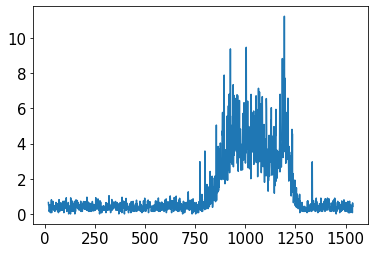

In [21]:
plt.plot(xx['dsi'])